In [5]:
from dpipe.dataset import CSV
import pandas as pd
import os
import numpy as np
from torch.utils.data import Dataset, DataLoader
from dpipe.dataset.wrappers import cache_methods
from dpipe.batch_iter import Infinite, load_by_random_id
from dpipe.batch_iter.utils import unpack_args
from dpipe.medim.visualize import slice3d
import cv2
class FederatedDataset_dpipe(CSV):
    def __init__(self, meta_path, image_path = '/nmnt/x3-hdd/data/DA/CC359/originalScaled',
                 target_path='/nmnt/x3-hdd/data/DA/CC359/Silver-standard-MLScaled', 
                 img_col='img', target_col='target', index_col = 'id'):
        '''
        :param class_name: one of ['siemens-M', 'siemens-F', 'ge-M', 'ge-F', 'philips-M', 'philips-F']
        '''
        self.image_path = image_path
        self.target_path = target_path
        self.meta_path = meta_path
        self.img_col = img_col
        self.target_col = target_col
        self.df_meta = pd.read_csv(meta_path)
        self.ids = self.df_meta[index_col]
        self.len = self.df_meta.shape[0]
    def load_x(self, _id):
        img = np.load(os.path.join(self.image_path, self.df_meta.iloc[_id][self.img_col]))
        img = np.clip(img, -1000, None)
        img = cv2.resize(img, (256, 170))
        return img.astype(np.float32)
    def load_y(self, _id):
        target = np.load(os.path.join(self.target_path, self.df_meta.iloc[_id][self.target_col]))
        return target.astype(np.float32)
    def __len__(self):
        return self.df_meta.shape[0]
    
def get_slice(*inputs):
    img, target = inputs
    # masked = ((x < 0).sum(axis=-2).sum(axis=-2) != 0)
    # to_decide = np.nonzero(masked)[0]
    _id = np.random.choice(img.shape[-1])

    #     print("X: ", x[:, _id, ...].shape, _id)
    #     print("M: ", m[:, _id, ...].shape, _id)
    return [[img[..., _id]], [target[..., _id]]]   
    
    
meta_path = '/nmnt/media/home/alex_samoylenko/Federated/FederatedUNet/FederatedUNet/dataset/metas/meta_philips-F.csv'
dataset = cache_methods(FederatedDataset_dpipe(meta_path),
                        methods=['load_x', 'load_y', '__len__'])
# dataloader = DataLoader(dataset)
n_samples_per_epoch = 4
batch_size = 2

trainloader = Infinite(
                load_by_random_id(dataset.load_x, dataset.load_y, ids=dataset.ids),
                unpack_args(get_slice),
                batches_per_epoch=max(n_samples_per_epoch//batch_size,1), batch_size=batch_size)
res = []
for i in trainloader():
    res.append(i)
    break

In [16]:
slice_ = np.array([dataset.load_x(1)[..., 50]])
print(slice_.min())
print(slice_.max())

-19.666573
2282.8481


In [8]:
images, target = res[0]

In [10]:
len(images[0])

1

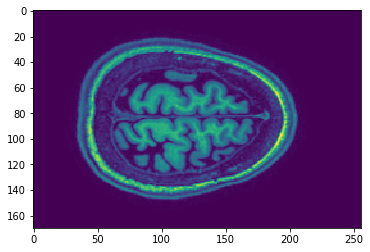

In [15]:
from matplotlib import pyplot as plt
plt.imshow(images[0][0],)

In [125]:
import PIL
import cv2
img = cv2.resize(images[1], (256, 180))

In [3]:
img.shape

NameError: name 'img' is not defined

In [1]:
slice3d(np.array(img[..., None]))
slice3d(np.array(res[0][0][1][..., None]))

NameError: name 'slice3d' is not defined

In [100]:
images[1]

(180, 240)

In [139]:
temp = torch.tensor(images)

In [140]:
temp.shape

torch.Size([2, 1, 170, 256])

In [90]:
img = np.zeros((256,256))

In [ ]:
img.

In [83]:
res[0][0].to('cuda')

AttributeError: 'numpy.ndarray' object has no attribute 'to'

In [76]:
slice3d(np.array([res[0][0][0]]), np.array([res[0][1][0]]), axis=0)

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=0), Output()), _dom_c…

ERROR:root:Source: error occured, setting event...
ERROR:root:Source: event was set
Exception in thread Thread-46:
Traceback (most recent call last):
  File "/nmnt/media/home/alex_samoylenko/miniconda3/lib/python3.7/threading.py", line 917, in _bootstrap_inner
    self.run()
  File "/nmnt/media/home/alex_samoylenko/miniconda3/lib/python3.7/threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "/nmnt/media/home/alex_samoylenko/miniconda3/lib/python3.7/site-packages/pdp/base.py", line 120, in target
    for value in iterable:
  File "/nmnt/media/home/alex_samoylenko/miniconda3/lib/python3.7/site-packages/dpipe/batch_iter/sources.py", line 47, in load_by_random_id
    yield squeeze_first(tuple(pam(loaders, id_)))
  File "/nmnt/media/home/alex_samoylenko/miniconda3/lib/python3.7/site-packages/dpipe/medim/itertools.py", line 27, in pam
    yield f(*args, **kwargs)
  File "<ipython-input-14-97f5f9fcdc71>", line 24, in load_x
    img = np.clip(img, -1000)
  File

StopEvent: pdp: Error in the tread or process was detected, check output for details.

In [148]:
torch.tensor(images).float()

tensor([[[[ 5.7964e-34, -4.6407e-33, -6.3732e-34,  ...,  1.3102e-24,
            1.8588e-25, -1.2037e-26],
          [ 2.1663e-34, -4.9942e-33,  6.1950e-33,  ...,  5.3831e-25,
            3.1685e-25,  2.3260e-26],
          [ 1.2967e-33,  1.2960e-33, -1.5742e-32,  ..., -3.1757e-24,
            2.8754e-25,  9.0239e-25],
          ...,
          [ 6.9637e-37, -2.0780e-37,  7.8281e-37,  ..., -3.7896e-33,
           -1.5403e-33, -1.1136e-33],
          [ 1.8540e-37, -1.5937e-36, -6.8164e-36,  ...,  3.9279e-34,
            1.3196e-34, -4.4222e-34],
          [ 1.2300e-37, -1.5539e-36, -3.2819e-36,  ..., -5.2589e-34,
           -1.2237e-34, -3.5586e-34]]],


        [[[ 5.5316e-36,  1.4156e-29, -1.1910e-28,  ..., -0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 6.5618e-36, -7.6500e-30,  6.4365e-29,  ..., -0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 1.4254e-35, -3.5786e-30,  3.0110e-29,  ...,  0.0000e+00,
           -0.0000e+00,  0.0000e+00],
          ...,
   

In [150]:
torch.tensor(targets)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, int64, int32, int16, int8, and uint8.

In [ ]:
np.load('/nmnt/x3-hdd/data/